# Trivago Web_Scraping

## Libraries Used

In [71]:
# Importing required libraries
import requests
from bs4 import BeautifulSoup
import selenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import warnings
warnings.filterwarnings('ignore')

## Extraction of data from the website

In [8]:
# Navigating to the Trivago website, using Selenium
driver = webdriver.Chrome()
wait = WebDriverWait(driver,10,poll_frequency=1)
driver.get('https://www.trivago.in/en-IN/srl/hotels-india?search=200-76;dr-20241006-20241007')
time.sleep(5)
driver.maximize_window()

In [18]:
# Scraping the hotels data using selenium
data = []
pg = 6
for i in range(1, 5):
    # Wait for the next page link to be clickable
    next_page = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="__next"]/div[1]/main/div[3]/section/div/div/div[1]/nav/ol/li['+str(pg)+']/button'))
    )
    next_page.click()
    # Update the page number
    if pg < 9:
        pg += 1
        
    page_source = driver.page_source
    data.append(page_source)
    print(f"Clicked {i} times")
    print(pg)


Clicked 1 times
7
Clicked 2 times
8
Clicked 3 times
9
Clicked 4 times
9


In [ ]:
# Again scraping more hotels data using selenium
for i in range(1, 4):
    # Wait for the next page link to be clickable
    next_page = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="__next"]/div[1]/main/div[3]/section/div/div/div[1]/nav/ol/li[9]/button'))
    )
    next_page.click()
        
    page_source = driver.page_source
    data.append(page_source)
    print(f"Clicked {i} times")
    print(pg)

In [135]:
# converting the data into text
all = str(data)

In [137]:
# Storing the data in soup
soup = BeautifulSoup(all, "html.parser")

In [139]:
# extracting the names of the hotels
name = []

tags = soup.find_all('h2', class_='tODn3R _5NF9ws nUywRG')

for i in tags:
    name.append(i.text)

print(name)
print(len(name))

['Hyatt Regency Amritsar', 'Radisson Hotel Agra', 'The Leela Mumbai', 'The Zuri Whitefield Bengaluru', 'Trident Nariman Point', 'Oyo 8607 Hotel Sky Inn', 'Aloft New Delhi Aerocity', 'Marasa Sarovar Premiere', 'Taj Palace, New Delhi', 'Sun-n-Sand Mumbai Juhu Beach', 'Crowne Plaza Pune City Centre, an IHG Hotel', 'Novotel Kolkata Hotel and Residences', 'Niranta Airport Transit – International Wing', 'ITC Grand Central, a Luxury Collection Hotel, Mumbai', 'The Fern Residency Aurangabad', 'Conrad Bengaluru', 'Le Royal Meridien Chennai', 'The Saga Hotel', 'Taj Deccan', 'Holiday Inn Mumbai International Airport, an IHG Hotel', 'Residency Hotel Fort', 'Crowne Plaza New Delhi Mayur Vihar Noida, an IHG Hotel', 'ibis Coimbatore City Centre - An Accor Brand', 'Crowne Plaza New Delhi Rohini, an IHG Hotel', 'Radisson Blu Hotel New Delhi Dwarka', 'The Park New Delhi', 'Hyatt Regency Delhi', 'ibis Mumbai Airport - An Accor Brand', 'Svenska Design Hotel, Electronic City, Bangalore', 'The Leela Ambienc

In [145]:
# extracting the number of stars received by each hotel
stars = []

div = soup.find_all('div', class_='yYtE_I P_jA_4')

for i in div:
    tags = i.find_all('span', class_='_3py97n oyVIxo')
    if tags == []:
        stars.append(np.nan)
    else:
        for tag in tags:
            tag_counts = 0
            cnt = tag.find_all('span', class_='Ji89fk xHuPmg _8YxhSF')
            for i in cnt:
                tag_counts += 1
            stars.append(tag_counts)

print(stars)
print(len(stars))

[5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, nan, 5, 4, 5, 5, nan, 5, 5, 3, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, nan, 4, 5, 5, 3, 5, 5, 3, 2, 5, 5, 3, 5, nan, 5, 3, 3, 5, 4, 5, 3, 5, 5, 5, 5, 4, 5, 4, 3, 4, 4, 4, 3, 4, 3, 4, 5, 3, 3, 5, 3, 4, 5, 5, 3, 4, 3, 5, nan, 5, nan, 4, 5, 3, 4, 3, 5, nan, nan, nan, 5, 5, 2, 5, 3, 4, 3, 3, 4, 5, 3, 5, 5, 3, 5, 4, 5, 3, 5, 5, 3, 4, 5, 3, 4, 5, 5, 3, 4, 3, 2, 5, 3, 1, 5, 5, 3, 5, 5, 3, 3, nan, 3, 3, 5, 4, 5, 5, 5, nan, 3, 3, 2, 4, nan, 5, 4, 5, 4, 5, 3, 5, nan, 3, 4, 3, nan, 3, 3, 5, nan, 4, 4, 3, 3, 3, 5, nan, 3, 5, 4, 5, 5, 5, nan, 3, 3, 2, 4, nan, 5, 4, 5, 4, 5, 3, 5, nan, 3, 4, 3, nan, 3, 3, 5, nan, 4, 4, 3, 3, 3, 5, nan, 3, 5, 4, 3, nan, 4, 4, nan, 3, 4, 3, 2, 3, nan, 5, 3, 3, 4, 3, nan, 5, 3, 5, 3, 3, 4, 3, nan, nan, 4, 3, 3, 3, 4, 3, 4, 4, nan, 3, nan, 4, 4, nan, 3, 4, 3, 2, 3, nan, 5, 3, 3, 4, 3, nan, 5, 3, 5, 3, 3, 4, 3, nan, nan, 4, 3, 3, 3, 4, 3, 4, 4, nan, 3, 3, 3, 3, 3, nan, nan, 3, 3, nan, 3, nan, 3, 4, 3, nan, 5, 3, 4, 5, 4, 3, nan, nan, 5

In [147]:
# extracting the type of each hotel
type = []

tags = soup.find_all('div', class_='yYtE_I P_jA_4')

for i in tags:
    type.append(i.text)

print(type)
print(len(type))

['Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Entire House / Apartment', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hostel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Guesthouse', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel', 'H

In [149]:
# extracting the location of each hotel
location = []

tags = soup.find_all('span', class_='wcZPz9')

for i in tags:
    location.append(i.text)

print(location)
print(len(location))

['Amritsar', 'Agra', 'Mumbai', 'Bengaluru', 'Mumbai', 'Hissar', 'Delhi', 'Tirupati', 'Delhi', 'Mumbai', 'Pune', 'Kolkata', 'Mumbai', 'Mumbai', 'Aurangabad', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Mumbai', 'Mumbai', 'Delhi', 'Coimbatore', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Mumbai', 'Amreli', 'Delhi', 'Mumbai', 'Delhi', 'Jaipur', 'Mumbai', 'Mumbai', 'Noida', 'Delhi', 'Delhi', 'Bengaluru', 'Pune', 'Rajkot', 'Mumbai', 'Gurgaon', 'Delhi', 'Mumbai', 'Varanasi', 'Mumbai', 'Noida', 'Bengaluru', 'Mumbai', 'Delhi', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Mumbai', 'Khimsar', 'Bengaluru', 'Bengaluru', 'Sriperumbudur', 'Delhi', 'Mumbai', 'Bengaluru', 'Salem', 'Kolkata', 'Greater Noida', 'Gurgaon', 'Bengaluru', 'Lucknow', 'Jaipur', 'Gurgaon', 'Delhi', 'Bengaluru', 'Chennai', 'Mumbai', 'Mumbai', 'Mumbai', 'Kochi', 'Bengaluru', 'Ghaziabad', 'Delhi', 'Jaipur', 'Kanatal', 'Chennai', 'Mumbai', 'Amritsar', 'Delhi', 'Jaipur', 'Bengaluru', 'Kolkata', 'Chennai', 'Jaipur', 'Dharamsala', 'Porbandar', 

In [151]:
# extracting the ratings and reviews received by each hotel
ratings_reviews = []

tags = soup.find_all('span', class_='eSyfQT SwVR4I')

for i in tags:
    ratings_reviews.append(i.text)
            
print(ratings_reviews)
print(len(ratings_reviews))

['8.5\xa0-\xa0Excellent\xa0(14875 ratings)', '8.0\xa0-\xa0Very good\xa0(4882 ratings)', '8.9\xa0-\xa0Excellent\xa0(9866 ratings)', '8.8\xa0-\xa0Excellent\xa0(3191 ratings)', '9.0\xa0-\xa0Excellent\xa0(15037 ratings)', '10\xa0-\xa0Excellent\xa0(69 ratings)', '8.8\xa0-\xa0Excellent\xa0(15237 ratings)', '7.7\xa0-\xa0Good\xa0(3968 ratings)', '8.9\xa0-\xa0Excellent\xa0(8771 ratings)', '8.1\xa0-\xa0Very good\xa0(10644 ratings)', '8.5\xa0-\xa0Excellent\xa0(5926 ratings)', '8.4\xa0-\xa0Very good\xa0(5536 ratings)', '8.1\xa0-\xa0Very good\xa0(5226 ratings)', '8.8\xa0-\xa0Excellent\xa0(5267 ratings)', '8.6\xa0-\xa0Excellent\xa0(4553 ratings)', '8.5\xa0-\xa0Excellent\xa0(1197 ratings)', '7.3\xa0(2621 ratings)', '7.0\xa0(273 ratings)', '8.7\xa0-\xa0Excellent\xa0(7282 ratings)', '8.2\xa0-\xa0Very good\xa0(7826 ratings)', '8.6\xa0-\xa0Excellent\xa0(11660 ratings)', '8.5\xa0-\xa0Excellent\xa0(4453 ratings)', '8.4\xa0-\xa0Very good\xa0(8803 ratings)', '8.8\xa0-\xa0Excellent\xa0(5761 ratings)', '7.9\xa

In [153]:
# extracting the starting price of each hotel
start_price = []

tags = soup.find_all('div', class_='jgrBpY yOLdgY')

for i in tags:
    tags = i.find_all('div', class_='iYZfVC')
    if tags == []:
        start_price.append(np.nan)
    else:
        for j in tags:
            tag = j.find('span', class_='_9jOjnw')
            price = i.find('b')
            start_price.append(price.text)
            
print(start_price)
print(len(start_price))

['₹6,628', '₹7,568', '₹11,632', '₹6,628', '₹13,248', nan, '₹10,913', '₹6,154', '₹20,498', '₹10,169', '₹6,137', '₹6,541', '₹7,277', '₹13,378', '₹4,677', '₹12,903', '₹4,858', '₹2,485', '₹8,320', '₹7,014', '₹6,277', '₹8,861', '₹3,113', '₹8,376', '₹12,694', '₹9,892', '₹13,207', '₹6,058', '₹2,758', '₹7,512', '₹10,661', '₹9,679', '₹676', '₹8,090', '₹4,418', '₹1,652', '₹11,740', '₹12,068', '₹784', '₹7,375', '₹3,086', '₹4,827', '₹4,453', '₹9,946', '₹8,231', '₹566', '₹8,251', nan, '₹13,470', '₹6,058', '₹2,403', '₹10,734', '₹13,576', '₹17,018', '₹5,144', '₹16,018', '₹12,803', '₹6,676', '₹8,296', '₹8,395', '₹8,903', '₹6,881', '₹1,087', '₹9,428', '₹7,567', '₹3,095', nan, '₹7,022', '₹9,900', '₹5,368', '₹11,152', '₹7,226', '₹2,136', '₹9,710', '₹5,382', '₹4,107', '₹12,215', '₹7,733', nan, '₹4,507', '₹4,375', '₹11,030', nan, '₹9,892', '₹4,419', '₹5,458', '₹10,383', '₹629', '₹9,405', '₹2,391', '₹4,088', '₹726', nan, '₹2,526', '₹17,901', '₹12,981', '₹636', '₹8,672', '₹10,762', '₹3,664', '₹2,749', '₹1,26

## Creation of DataFrame

In [1819]:
trivago_df = { 'name': name, 'stars' : stars, 'type' : type, 'location' : location, 'ratings_reviews' : ratings_reviews,
              'start_price' : start_price}
trivago_df = pd.DataFrame(trivago_df)
trivago_df

,name,stars,type,location,ratings_reviews,start_price
0,Hyatt Regency Amritsar,5.0,Hotel,Amritsar,8.5 - Excellent (14875 ratings),"₹6,628"
1,Radisson Hotel Agra,5.0,Hotel,Agra,8.0 - Very good (4882 ratings),"₹7,568"
2,The Leela Mumbai,5.0,Hotel,Mumbai,8.9 - Excellent (9866 ratings),"₹11,632"
3,The Zuri Whitefield Bengaluru,5.0,Hotel,Bengaluru,8.8 - Excellent (3191 ratings),"₹6,628"
4,Trident Nariman Point,5.0,Hotel,Mumbai,9.0 - Excellent (15037 ratings),"₹13,248"
...,...,...,...,...,...,...
1045,Comfotel,NaN,Hotel,Kolkata,6.7 (39 ratings),"₹2,425"
1046,"HK Clarks Inn, Amritsar",3.0,Hotel,Amritsar,7.9 - Good (950 ratings),"₹4,702"
1047,Comfort Inn Rishikesh,NaN,Hotel,Rishikesh,6.9 (8 ratings),"₹4,141"
1048,Fabexpress Amrit Residency,NaN,Hotel,Gurgaon,8.8 - Excellent (71 ratings),"₹2,729"


## Data Pre-processing

In [1822]:
# overview of the dataframe
trivago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1050 non-null   object 
 1   stars            811 non-null    float64
 2   type             1050 non-null   object 
 3   location         1050 non-null   object 
 4   ratings_reviews  1050 non-null   object 
 5   start_price      964 non-null    object 
dtypes: float64(1), object(5)
memory usage: 49.3+ KB


In [1824]:
# checking for the duplicate rows
duplicates = trivago_df.duplicated()
num_duplicates = duplicates.sum()
duplicate_rows = trivago_df[trivago_df.duplicated(keep=False)]

print(f'Number of duplicate rows: {num_duplicates}')
print('Duplicate rows:')
print(duplicate_rows)

Number of duplicate rows: 274
Duplicate rows:
                                           name  stars                type  \
27         ibis Mumbai Airport - An Accor Brand    3.0               Hotel   
49         ibis Mumbai Airport - An Accor Brand    3.0               Hotel   
140                    Sheraton New Delhi Hotel    5.0               Hotel   
141                     The Anya Hotel, Gurgaon    5.0               Hotel   
142   Holiday Inn Kolkata Airport, an IHG Hotel    5.0               Hotel   
...                                         ...    ...                 ...   
1041               Tree of Life Bed & Breakfast    NaN     Bed & Breakfast   
1042              Golden Fruits Business Suites    3.0  Serviced apartment   
1045                                   Comfotel    NaN               Hotel   
1048                 Fabexpress Amrit Residency    NaN               Hotel   
1049                     Perch Arbor Cyber City    NaN               Hotel   

     location    

In [1826]:
# removing duplicate rows
trivago_df.drop_duplicates(inplace=True)

print('DataFrame after dropping one copy of duplicates:')
print(df_deduplicated)

DataFrame after dropping one copy of duplicates:
                                                   name  stars   type  \
0                                Hyatt Regency Amritsar    5.0  Hotel   
1                                   Radisson Hotel Agra    5.0  Hotel   
2                                      The Leela Mumbai    5.0  Hotel   
3                         The Zuri Whitefield Bengaluru    5.0  Hotel   
4                                 Trident Nariman Point    5.0  Hotel   
...                                                 ...    ...    ...   
1017                         Hotel Krishna by KeyMagics    2.0  Hotel   
1032                         The Leela Palace New Delhi    5.0  Hotel   
1043  Keys Select by Lemon Tree Hotels, Katti-Ma, Ch...    3.0  Hotel   
1044                          Itsy By Treebo | Southend    3.0  Hotel   
1046                            HK Clarks Inn, Amritsar    3.0  Hotel   

        location                  ratings_reviews start_price  
0       Am

In [1828]:
# checking for null values
trivago_df.isna().sum()

name                 0
stars              174
type                 0
location             0
ratings_reviews      0
start_price         63
dtype: int64

In [1830]:
# checking value counts in stars column
trivago_df['stars'].value_counts()

stars
3.0    296
5.0    148
4.0    124
2.0     27
1.0      7
Name: count, dtype: int64

In [1832]:
# Stars column contains values from 1 to 5, which may indicate that few hotels have not received any stars
# and hence those rows have null values
# filling null values in stars column with 0, assuming the same
trivago_df['stars'] = trivago_df['stars'].fillna('0')
trivago_df.isna().sum()

name                0
stars               0
type                0
location            0
ratings_reviews     0
start_price        63
dtype: int64

In [1834]:
# checking size of the dataframe after dropping null rows
trivago_df.shape

(776, 6)

In [1836]:
# dropping null rows from the dataframe where start_price is not given and checking the remaining size
trivago_df.dropna(inplace=True)
trivago_df.shape

(713, 6)

In [1838]:
# checking for null values
trivago_df.isna().sum()

name               0
stars              0
type               0
location           0
ratings_reviews    0
start_price        0
dtype: int64

#### Spliting the ratings_reviews data

In [1841]:
# checking ratings_reviews column
trivago_df['ratings_reviews']

0       8.5 - Excellent (14875 ratings)
1        8.0 - Very good (4882 ratings)
2        8.9 - Excellent (9866 ratings)
3        8.8 - Excellent (3191 ratings)
4       9.0 - Excellent (15037 ratings)
                     ...               
1032     9.4 - Excellent (4868 ratings)
1043      8.2 - Very good (746 ratings)
1044      8.9 - Excellent (468 ratings)
1046           7.9 - Good (950 ratings)
1047                    6.9 (8 ratings)
Name: ratings_reviews, Length: 713, dtype: object

In [1842]:
# splitting ratings from the combined column of ratings and reviews
trivago_df[['rating','ratings_reviews']] = trivago_df['ratings_reviews'].str.split('-', n=1, expand=True)
trivago_df['rating']

0                  8.5 
1                  8.0 
2                  8.9 
3                  8.8 
4                  9.0 
             ...       
1032               9.4 
1043               8.2 
1044               8.9 
1046               7.9 
1047    6.9 (8 ratings)
Name: rating, Length: 713, dtype: object

In [1843]:
# handling ratings column structure and datatype
trivago_df[['space','rate','one','deci','las','spa']] = trivago_df['rating'].str.split('', n=5, expand=True)
trivago_df[['space','rate','one','deci','las','spa']] 

,space,rate,one,deci,las,spa
0,,8,.,5,,
1,,8,.,0,,
2,,8,.,9,,
3,,8,.,8,,
4,,9,.,0,,
...,...,...,...,...,...,...
1032,,9,.,4,,
1043,,8,.,2,,
1044,,8,.,9,,
1046,,7,.,9,,


In [1844]:
trivago_df['rating'] = trivago_df['rate'] + trivago_df['one'] + trivago_df['deci']
trivago_df['rating']

0       8.5
1       8.0
2       8.9
3       8.8
4       9.0
       ... 
1032    9.4
1043    8.2
1044    8.9
1046    7.9
1047    6.9
Name: rating, Length: 713, dtype: object

In [1846]:
# splitting overall_quality from the combined column of ratings and reviews
trivago_df[['overall_quality','ratings_reviews']] = trivago_df['ratings_reviews'].str.split('(', n=1, expand=True)
trivago_df['overall_quality']

0        Excellent 
1        Very good 
2        Excellent 
3        Excellent 
4        Excellent 
           ...     
1032     Excellent 
1043     Very good 
1044     Excellent 
1046          Good 
1047           None
Name: overall_quality, Length: 713, dtype: object

In [1847]:
# splitting count_of_ratings from the combined column of ratings and reviews
trivago_df[['count_of_ratings','ratings_reviews']] = trivago_df['ratings_reviews'].str.split(' ', n=1, expand=True)
trivago_df['count_of_ratings']

0       14875
1        4882
2        9866
3        3191
4       15037
        ...  
1032     4868
1043      746
1044      468
1046      950
1047     None
Name: count_of_ratings, Length: 713, dtype: object

In [1848]:
# dropping the extra column from the dataframe
trivago_df.drop('ratings_reviews', axis=1, inplace=True)
trivago_df

,name,stars,type,location,start_price,rating,space,rate,one,deci,las,spa,overall_quality,count_of_ratings
0,Hyatt Regency Amritsar,5.0,Hotel,Amritsar,"₹6,628",8.5,,8,.,5,,,Excellent,14875
1,Radisson Hotel Agra,5.0,Hotel,Agra,"₹7,568",8.0,,8,.,0,,,Very good,4882
2,The Leela Mumbai,5.0,Hotel,Mumbai,"₹11,632",8.9,,8,.,9,,,Excellent,9866
3,The Zuri Whitefield Bengaluru,5.0,Hotel,Bengaluru,"₹6,628",8.8,,8,.,8,,,Excellent,3191
4,Trident Nariman Point,5.0,Hotel,Mumbai,"₹13,248",9.0,,9,.,0,,,Excellent,15037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,The Leela Palace New Delhi,5.0,Hotel,Delhi,"₹18,878",9.4,,9,.,4,,,Excellent,4868
1043,"Keys Select by Lemon Tree Hotels, Katti-Ma, Ch...",3.0,Hotel,Chennai,"₹6,927",8.2,,8,.,2,,,Very good,746
1044,Itsy By Treebo | Southend,3.0,Hotel,Chandigarh,"₹2,585",8.9,,8,.,9,,,Excellent,468
1046,"HK Clarks Inn, Amritsar",3.0,Hotel,Amritsar,"₹4,702",7.9,,7,.,9,,,Good,950


#### Splitting the price data

In [1850]:
# handling the start_price column
trivago_df[['start_price','starting_price']] = trivago_df['start_price'].str.split('₹', expand=True)

In [1851]:
trivago_df['starting_price'] = trivago_df['starting_price'].str.replace(',', '')
trivago_df['starting_price']

0        6628
1        7568
2       11632
3        6628
4       13248
        ...  
1032    18878
1043     6927
1044     2585
1046     4702
1047     4141
Name: starting_price, Length: 713, dtype: object

In [1852]:
# checking for the required columns in the dataframe
trivago_df.columns

Index(['name', 'stars', 'type', 'location', 'start_price', 'rating', 'space',
       'rate', 'one', 'deci', 'las', 'spa', 'overall_quality',
       'count_of_ratings', 'starting_price'],
      dtype='object')

In [1853]:
# selecting the required columns
trivago_df = trivago_df[['name', 'stars', 'type', 'location', 'starting_price', 'rating', 'count_of_ratings',
       'overall_quality']]
trivago_df

,name,stars,type,location,starting_price,rating,count_of_ratings,overall_quality
0,Hyatt Regency Amritsar,5.0,Hotel,Amritsar,6628,8.5,14875,Excellent
1,Radisson Hotel Agra,5.0,Hotel,Agra,7568,8.0,4882,Very good
2,The Leela Mumbai,5.0,Hotel,Mumbai,11632,8.9,9866,Excellent
3,The Zuri Whitefield Bengaluru,5.0,Hotel,Bengaluru,6628,8.8,3191,Excellent
4,Trident Nariman Point,5.0,Hotel,Mumbai,13248,9.0,15037,Excellent
...,...,...,...,...,...,...,...,...
1032,The Leela Palace New Delhi,5.0,Hotel,Delhi,18878,9.4,4868,Excellent
1043,"Keys Select by Lemon Tree Hotels, Katti-Ma, Ch...",3.0,Hotel,Chennai,6927,8.2,746,Very good
1044,Itsy By Treebo | Southend,3.0,Hotel,Chandigarh,2585,8.9,468,Excellent
1046,"HK Clarks Inn, Amritsar",3.0,Hotel,Amritsar,4702,7.9,950,Good


#### Changing columns with the required data types

In [1855]:
# checking the dataframe information
trivago_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 1047
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              713 non-null    object
 1   stars             713 non-null    object
 2   type              713 non-null    object
 3   location          713 non-null    object
 4   starting_price    713 non-null    object
 5   rating            713 non-null    object
 6   count_of_ratings  541 non-null    object
 7   overall_quality   541 non-null    object
dtypes: object(8)
memory usage: 50.1+ KB


In [1865]:
# checking columns to change
trivago_df.columns

Index(['name', 'stars', 'type', 'location', 'starting_price', 'rating',
       'count_of_ratings', 'overall_quality'],
      dtype='object')

In [1866]:
# selecting columns to change
columns_to_convert = ['stars', 'starting_price', 'rating', 'count_of_ratings']

In [1867]:
# converting each column to numeric, handling errors by converting problematic entries to NaN
for column in columns_to_convert:
    trivago_df[column] = pd.to_numeric(trivago_df[column], errors='coerce')

In [1869]:
# checking the dataframe information
trivago_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 1047
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              713 non-null    object 
 1   stars             713 non-null    float64
 2   type              713 non-null    object 
 3   location          713 non-null    object 
 4   starting_price    713 non-null    int64  
 5   rating            712 non-null    float64
 6   count_of_ratings  541 non-null    float64
 7   overall_quality   541 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 50.1+ KB


In [1870]:
trivago_df

,name,stars,type,location,starting_price,rating,count_of_ratings,overall_quality
0,Hyatt Regency Amritsar,5.0,Hotel,Amritsar,6628,8.5,14875.0,Excellent
1,Radisson Hotel Agra,5.0,Hotel,Agra,7568,8.0,4882.0,Very good
2,The Leela Mumbai,5.0,Hotel,Mumbai,11632,8.9,9866.0,Excellent
3,The Zuri Whitefield Bengaluru,5.0,Hotel,Bengaluru,6628,8.8,3191.0,Excellent
4,Trident Nariman Point,5.0,Hotel,Mumbai,13248,9.0,15037.0,Excellent
...,...,...,...,...,...,...,...,...
1032,The Leela Palace New Delhi,5.0,Hotel,Delhi,18878,9.4,4868.0,Excellent
1043,"Keys Select by Lemon Tree Hotels, Katti-Ma, Ch...",3.0,Hotel,Chennai,6927,8.2,746.0,Very good
1044,Itsy By Treebo | Southend,3.0,Hotel,Chandigarh,2585,8.9,468.0,Excellent
1046,"HK Clarks Inn, Amritsar",3.0,Hotel,Amritsar,4702,7.9,950.0,Good


In [1871]:
# checking for the null values
trivago_df.isnull().sum()

name                  0
stars                 0
type                  0
location              0
starting_price        0
rating                1
count_of_ratings    172
overall_quality     172
dtype: int64

In [1872]:
# checking the dataframe information
trivago_df.describe()

,stars,starting_price,rating,count_of_ratings
count,713.000000,713.000000,712.000000,541.000000
mean,2.927069,4877.922861,7.923876,3054.428835
std,1.693596,4342.552597,0.971618,4058.443086
min,0.000000,499.000000,3.400000,8.000000
25%,3.000000,1871.000000,7.500000,273.000000
50%,3.000000,3234.000000,8.000000,1236.000000
75%,4.000000,6650.000000,8.600000,4433.000000
max,5.000000,32591.000000,9.900000,23193.000000


In [1876]:
# filling null values in count_of_ratings with 0 assuming that there is no rating received by that hotel
trivago_df['count_of_ratings'] = trivago_df['count_of_ratings'].fillna(0)
trivago_df.isnull().sum()

name                  0
stars                 0
type                  0
location              0
starting_price        0
rating                1
count_of_ratings      0
overall_quality     172
dtype: int64

In [1877]:
# filling null values in overall_quality with 'others' assuming that these are hotels which has quality below good
trivago_df['overall_quality'] = trivago_df['overall_quality'].fillna('Others')
trivago_df.isnull().sum()

name                0
stars               0
type                0
location            0
starting_price      0
rating              1
count_of_ratings    0
overall_quality     0
dtype: int64

In [1878]:
# dropping the null rows and checking info
trivago_df.dropna(inplace=True)
trivago_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 1047
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              712 non-null    object 
 1   stars             712 non-null    float64
 2   type              712 non-null    object 
 3   location          712 non-null    object 
 4   starting_price    712 non-null    int64  
 5   rating            712 non-null    float64
 6   count_of_ratings  712 non-null    float64
 7   overall_quality   712 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 50.1+ KB


In [1889]:
trivago_df.to_excel('trivago.xlsx',index=False)

## Exploratory Data Analysis (EDA)

In [5]:
trivago_df = pd.read_excel(r"C:\Users\RASHI\OneDrive\Documents\MASAI\Web Scrapping Project\trivago.xlsx")
trivago_df.head()

,name,stars,type,location,starting_price,rating,count_of_ratings,overall_quality
0,Hyatt Regency Amritsar,5,Hotel,Amritsar,6628,8.5,14875,Excellent
1,Radisson Hotel Agra,5,Hotel,Agra,7568,8.0,4882,Very good
2,The Leela Mumbai,5,Hotel,Mumbai,11632,8.9,9866,Excellent
3,The Zuri Whitefield Bengaluru,5,Hotel,Bengaluru,6628,8.8,3191,Excellent
4,Trident Nariman Point,5,Hotel,Mumbai,13248,9.0,15037,Excellent


### Statistical Analysis

In [10]:
# Summary statistics for numeric columns
summary_stats = trivago_df[['stars', 'starting_price', 'rating', 'count_of_ratings', 'overall_quality']].describe()
print("Summary Statistics:")
print(summary_stats)

# Summary statistics for categorical columns
categorical_stats = trivago_df[['name', 'type', 'location']].describe()
print("\nCategorical Statistics:")
print(categorical_stats)

Summary Statistics:
            stars  starting_price      rating  count_of_ratings
count  712.000000      712.000000  712.000000        712.000000
mean     2.924157     4856.983146    7.923876       2313.255618
std      1.693001     4309.433365    0.971618       3769.432705
min      0.000000      499.000000    3.400000          0.000000
25%      3.000000     1870.500000    7.500000          8.750000
50%      3.000000     3232.500000    8.000000        502.000000
75%      4.000000     6633.500000    8.600000       2995.750000
max      5.000000    32591.000000    9.900000      23193.000000

Categorical Statistics:
          name   type location
count      712    712      712
unique     711      7       64
top     Konark  Hotel    Delhi
freq         2    633      151


### Analysing Ranges of Data and their Correlation using Histogram and Scatter Plot

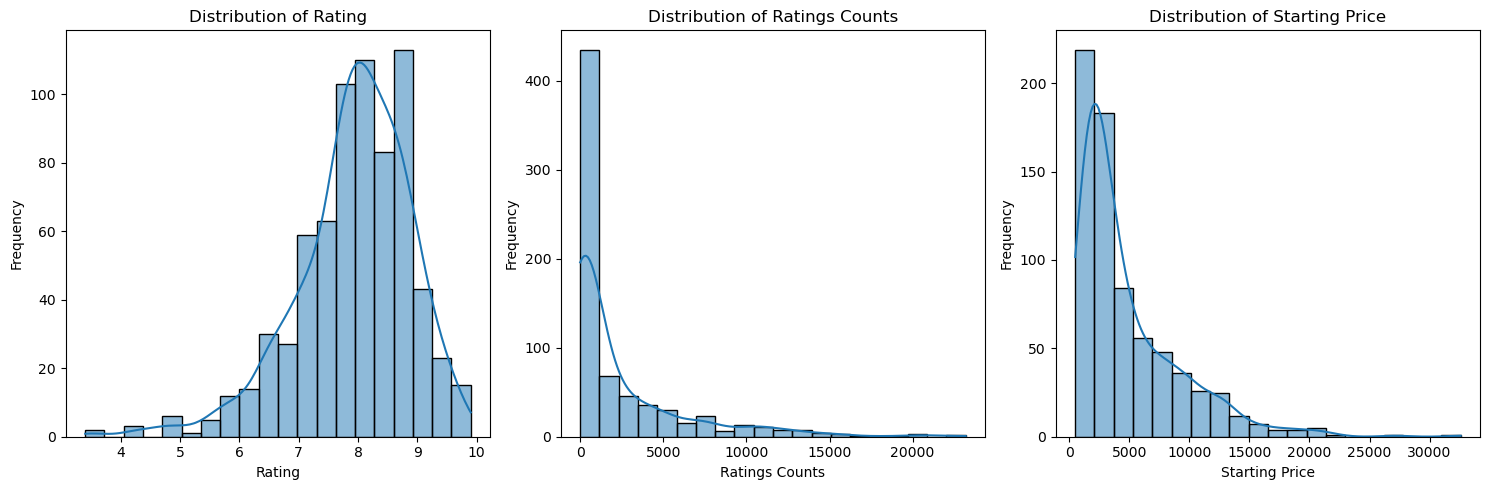

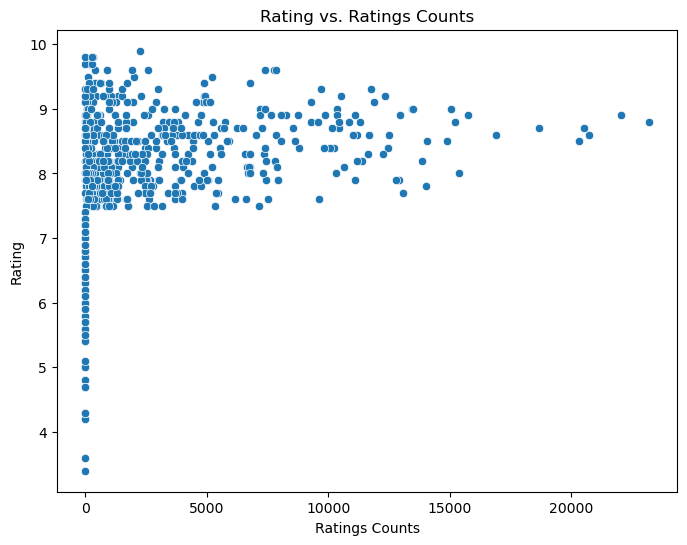

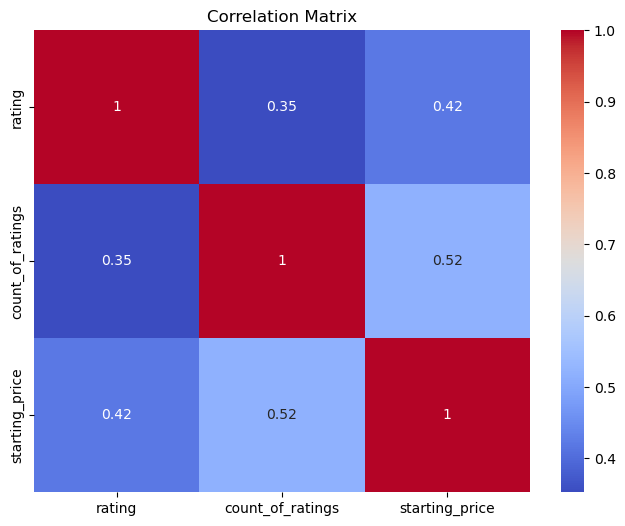

In [13]:
# Setting up the figure
plt.figure(figsize=(15, 5))

# Histogram for ratings
plt.subplot(1, 3, 1)
plt.grid(False)
sns.histplot(trivago_df['rating'], bins=20, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Histogram for count of ratings
plt.subplot(1, 3, 2)
plt.grid(False)
sns.histplot(trivago_df['count_of_ratings'], bins=20, kde=True)
plt.title('Distribution of Ratings Counts')
plt.xlabel('Ratings Counts')
plt.ylabel('Frequency')

# Histogram for starting price
plt.subplot(1, 3, 3)
plt.grid(False)
sns.histplot(trivago_df['starting_price'], bins=20, kde=True)
plt.title('Distribution of Starting Price')
plt.xlabel('Starting Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot for ratings vs. count of ratings
plt.figure(figsize=(8, 6))
plt.grid(False)
sns.scatterplot(x='count_of_ratings', y='rating', data=trivago_df)
plt.title('Rating vs. Ratings Counts')
plt.xlabel('Ratings Counts')
plt.ylabel('Rating')
plt.show()

# Correlation matrix
correlation_matrix = trivago_df[['rating', 'count_of_ratings', 'starting_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
trivago_df.columns

Index(['name', 'stars', 'type', 'location', 'starting_price', 'rating',
       'count_of_ratings', 'overall_quality'],
      dtype='object')

### Distribution of Ratings across different Price Ranges

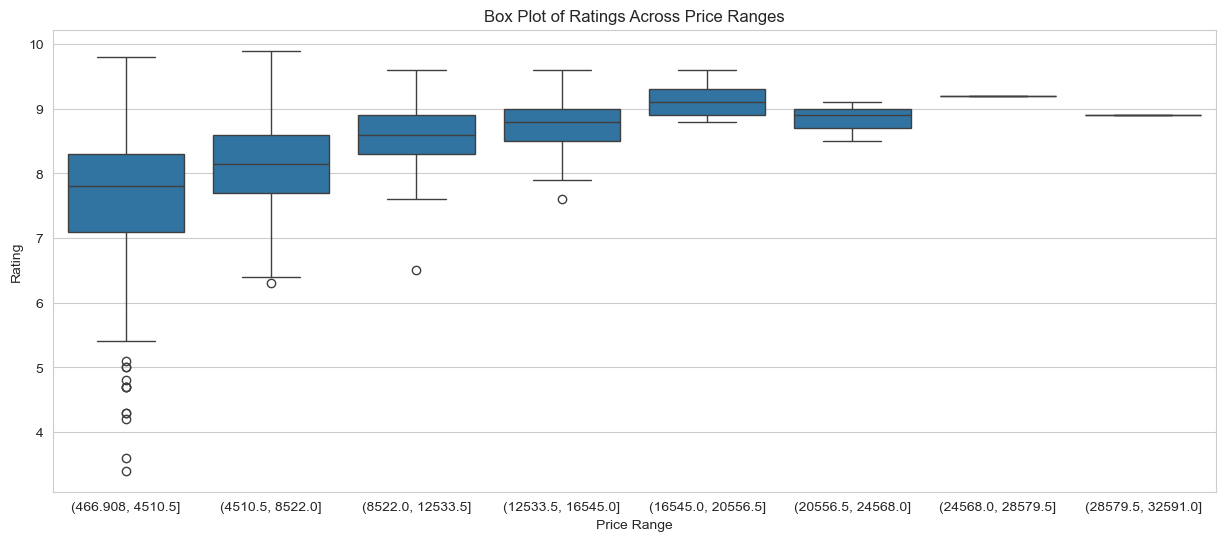

In [49]:
# Creating a column of Price Ranges
trivago_df['price_range'] = pd.cut(trivago_df['starting_price'], bins=8)

# Creating a box plot to check outliers in the dataframe
plt.figure(figsize=(15, 6))

# Setting x-axis labels
sns.boxplot(x='price_range', y='rating', data=trivago_df)
plt.title('Box Plot of Ratings Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

### Distribution of Type

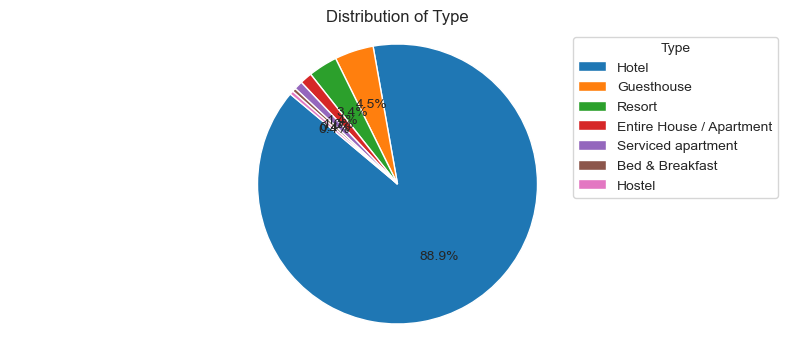

In [51]:
# Creating a DataFrame with counts
type_counts_df = trivago_df['type'].value_counts().reset_index()
type_counts_df.columns = ['type', 'count']

# Boxplot for ratings by type
plt.figure(figsize=(10, 4))
plt.grid(False)

bar_plot = plt.pie(type_counts_df['count'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(type_counts_df['type'], title="Type", loc="upper right")

plt.show()

## Additional Analysis

### Rating vs Type

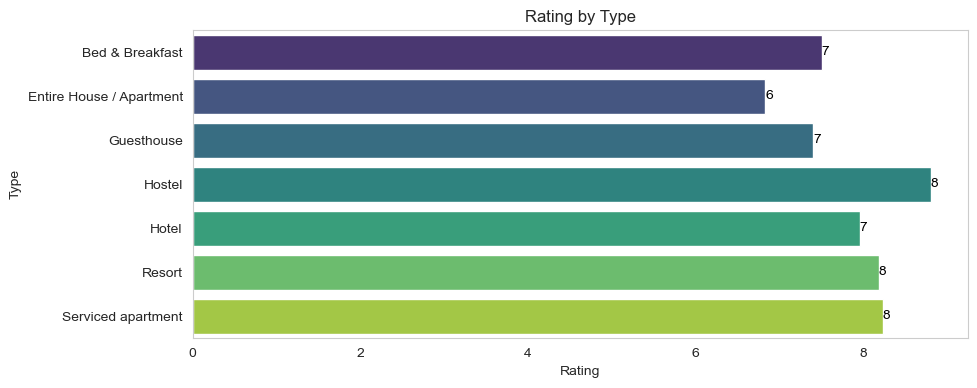

In [54]:
average_ratings = trivago_df.groupby('type')['rating'].mean().reset_index()

# Boxplot for ratings by type
plt.figure(figsize=(10, 4))
plt.grid(False)
bar_plot= sns.barplot(x='rating', y='type', data=average_ratings, palette='viridis')
plt.title('Rating by Type')
plt.xlabel('Rating')
plt.ylabel('Type')

# Adding labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', 
                      fontsize=10, color='black')
plt.show()

### Average Starting Price vs Location

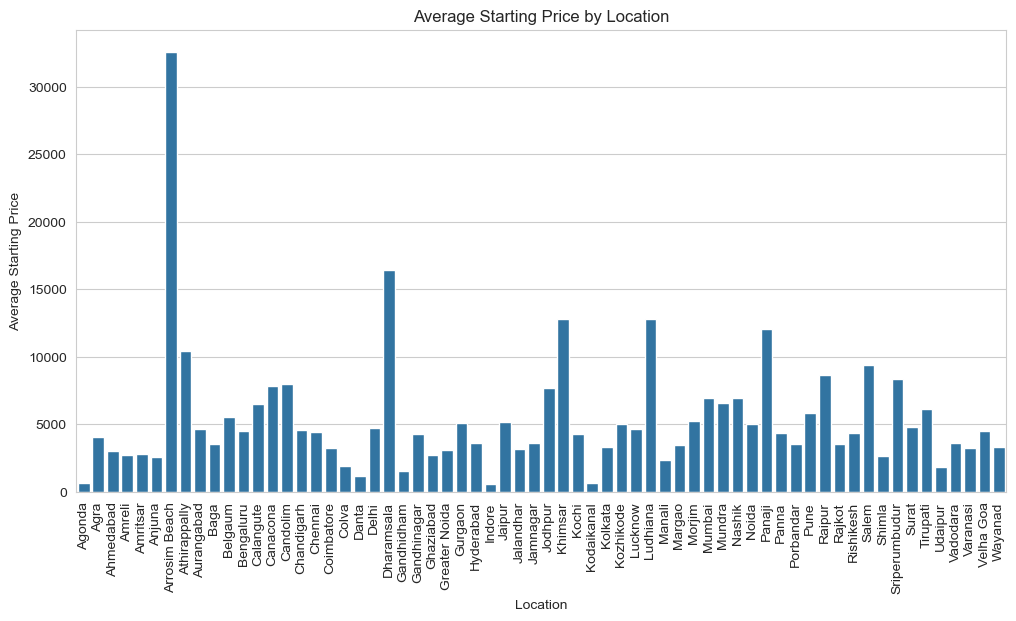

In [24]:
average_startprice = trivago_df.groupby('location')['starting_price'].mean().reset_index()

# Boxplot for starting price by location
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
bar_plot= sns.barplot(x='location', y='starting_price', data=average_startprice)
plt.title('Average Starting Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Starting Price')
plt.xticks(rotation=90)
plt.show()

### Top 10 Expensive Accomodations

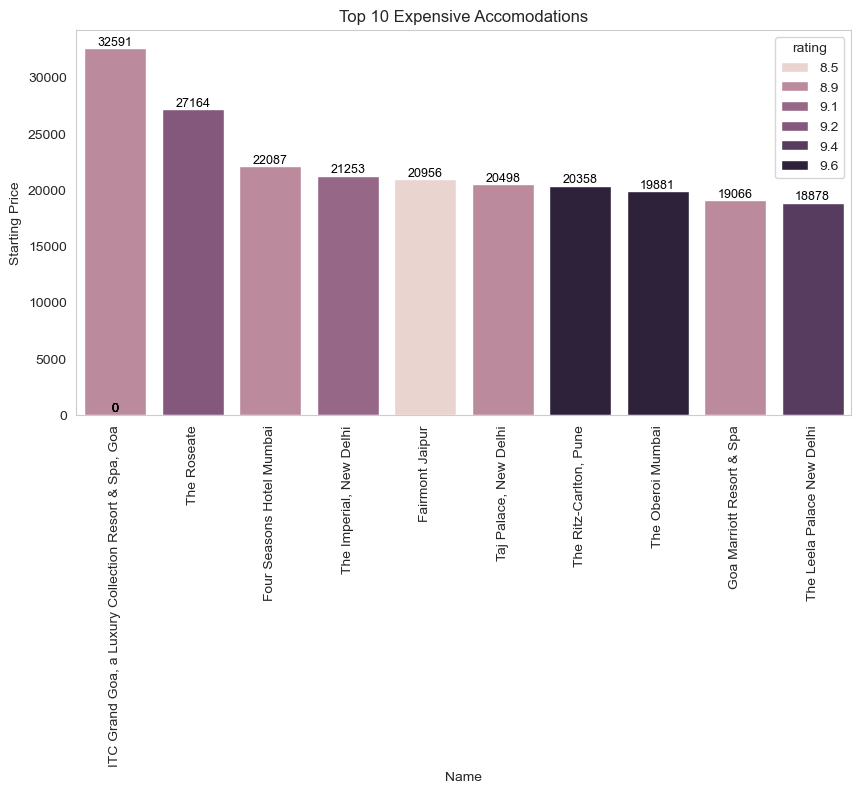

In [113]:
startprice = trivago_df[['name','rating','starting_price']].sort_values(by='starting_price', ascending=False).head(10)

# Boxplot for starting price by location
plt.figure(figsize=(10, 5))
plt.grid(False)
bar_plot= sns.barplot(x='name', y='starting_price', hue='rating', data=startprice)
plt.title('Top 10 Expensive Accomodations')
plt.xlabel('Name')
plt.ylabel('Starting Price')
plt.xticks(rotation=90)

# Adding labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=9, color='black')
    
plt.show()

### Top 10 Cheap Accomodations

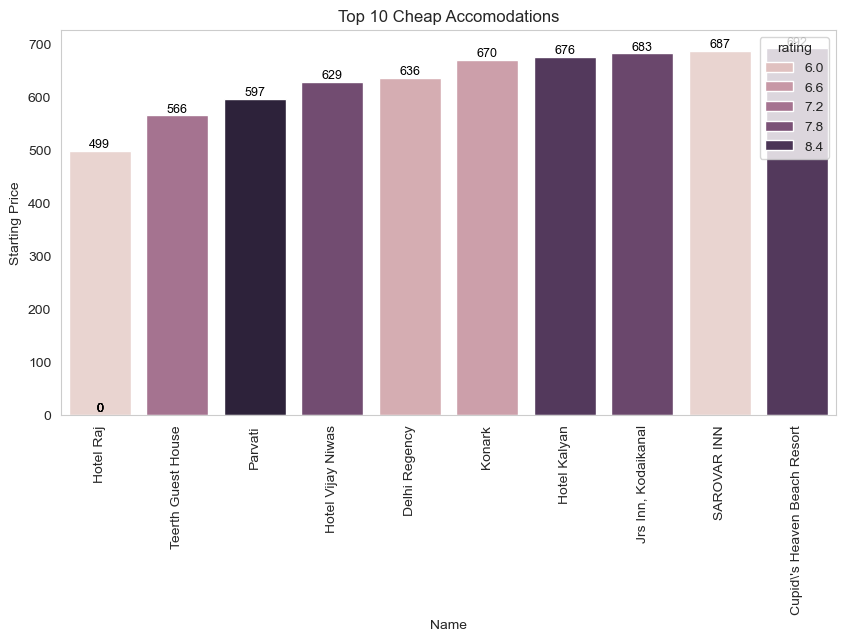

In [97]:
startprice = trivago_df[['name','rating', 'starting_price']].sort_values(by='starting_price').head(10)

# Boxplot for starting price by location
plt.figure(figsize=(10, 5))
plt.grid(False)
sns.set_style('whitegrid')
bar_plot= sns.barplot(x='name', y='starting_price',hue='rating' , data=startprice)
plt.title('Top 10 Cheap Accomodations')
plt.xlabel('Name')
plt.ylabel('Starting Price')
plt.xticks(rotation=90)

# Adding labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=9, color='black')
    
plt.show()

### Distribution of Stars

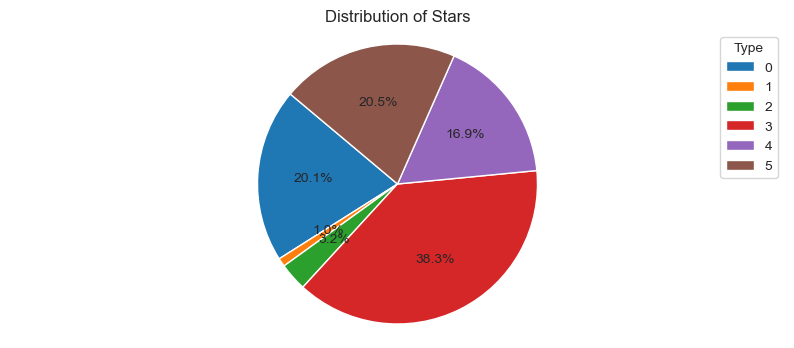

In [173]:
# Create a DataFrame with counts
stars_type = trivago_df['stars'].value_counts().reset_index()
stars_type.columns = ['stars', 'count']
stars_type = type_counts_df.sort_values(by='stars')

# Boxplot for ratings by type
plt.figure(figsize=(10, 4))
plt.grid(False)
bar_plot = plt.pie(stars_type['count'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stars')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(stars_type['stars'], title="Type", loc="upper right")

plt.show()

### Rating vs Stars

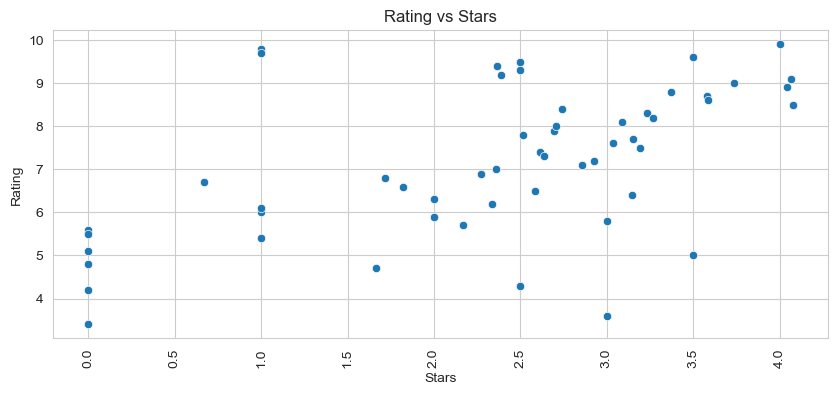

In [165]:
star_rating_crr = trivago_df.groupby('rating')['stars'].mean().sort_values().reset_index()

# Boxplot for starting price by location
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')
bar_plot= sns.scatterplot(x='stars', y='rating', data=star_rating_crr)
plt.title('Rating vs Stars')
plt.xlabel('Stars')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

### Rating vs Overall Quality

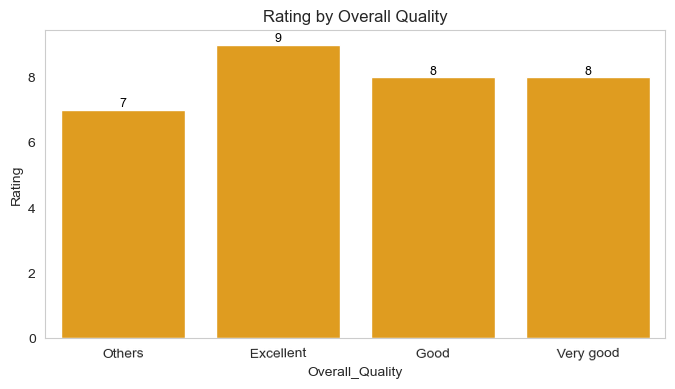

In [175]:
rating_quality = trivago_df.groupby('overall_quality')['rating'].mean().round().reset_index()

# Boxplot for starting price by location
plt.figure(figsize=(8, 4))
plt.grid(False)
bar_plot= sns.barplot(x='overall_quality', y='rating', data=rating_quality, color='orange')
plt.title('Rating by Overall Quality')
plt.xlabel('Overall_Quality')
plt.ylabel('Rating')
plt.xticks(rotation=1)

# Adding labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=9, color='black')
plt.show()

# Comprehensive Report on Trivago Accommodation Data

## Introduction
This report analyzes accommodation trends and customer sentiment based on data scraped from the Trivago website. The dataset includes various attributes such as ratings, review counts, price ranges, and types of accommodations available. The goal of this analysis is to uncover insights into customer preferences and behaviors, assess the distribution of ratings, and understand the impact of pricing on customer satisfaction.

### Data Sources
- Trivago accommodation dataset containing names, stars, types, locations, starting prices, ratings, count of ratings, overall quality.
- Data was sourced from web scraping the Trivago website, targeting accommodation listings to collect relevant attributes. The scraping process was conducted using Python libraries such as Beautiful Soup and Selenium to ensure comprehensive data collection.

## Data Analysis Methodology

### Data Cleaning
- The dataset was inspected for missing values and outliers.
- Columns such as name, stars, type, location, starting price, rating, count of ratings, overall quality were retained for analysis.
- Missing entries in critical columns were handled by removing or imputing values as necessary.

### Analysis Techniques
- **Descriptive Statistics:** Summary statistics to understand the distribution of ratings and review counts.
- **Visualization:** Histograms, box plots, and pie charts to visually represent data distributions and proportions.
- **Comparative Analysis:** Comparing ratings across different accommodation types and price ranges.

## Findings

### Ratings and Review Counts
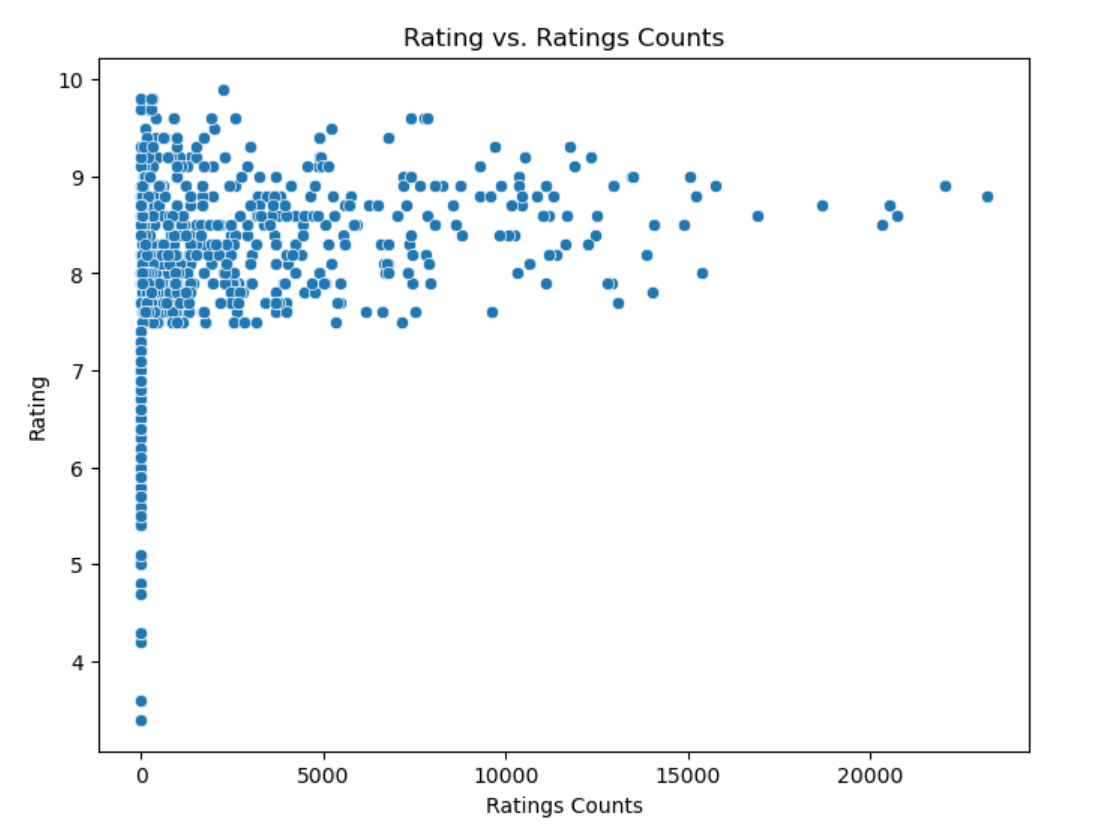

- The histogram of ratings shows that most ratings are clustered around **7 to 9 stars**, indicating a high level of customer satisfaction.
- The distribution of counts of ratings indicates that **most accommodations receive between 50 and 1000 reviews**, suggesting a moderate engagement level from guests.

### Distribution of Ratings Across Price Ranges
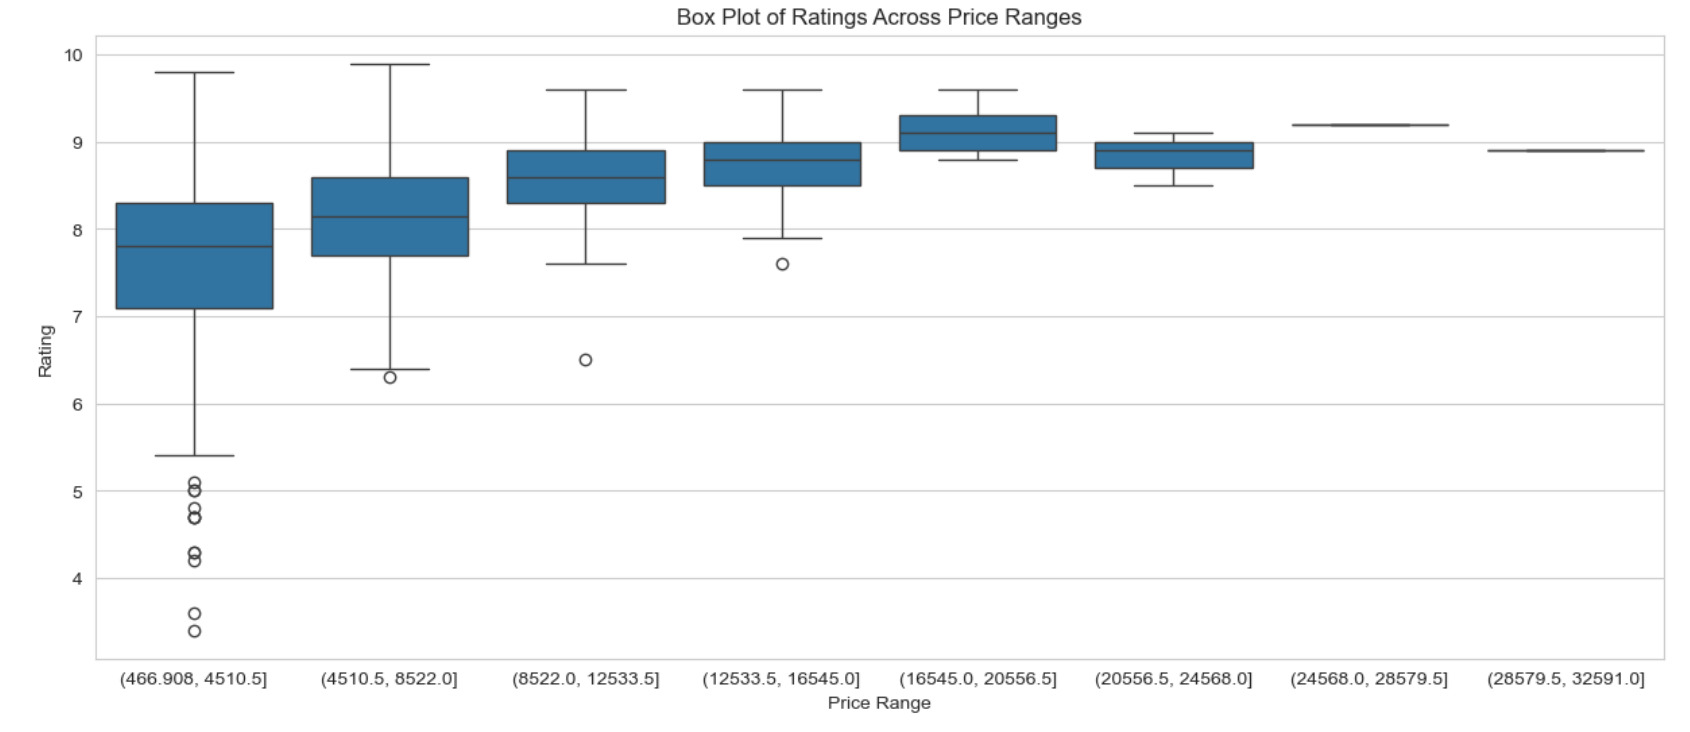

- The box plot illustrates that **lower-priced accommodations tend to have a wider range of ratings**, with some options receiving very high ratings, while higher-priced options show consistency, clustering around a rating of 9.

### Proportion of Different Accommodation Types
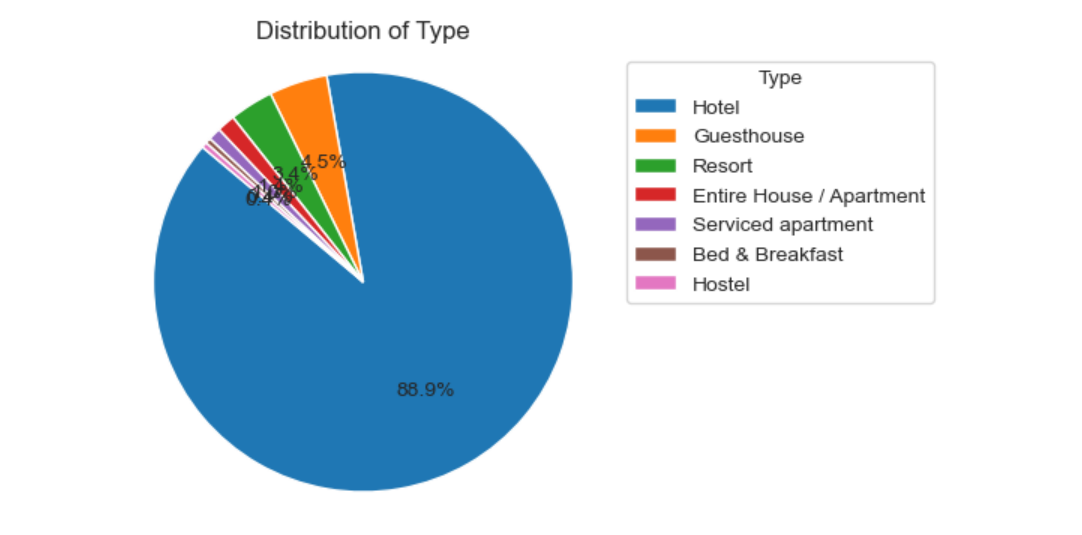

- The pie chart reveals that **hotels comprise the largest segment of accommodations**, followed by guest houses and resorts, with a few others making up the remainder, indicating a diverse range of options for travelers.

## Conclusion
- **Summary of Findings:** The analysis highlights that most accommodations receive favorable ratings, with a significant concentration of ratings in the lower price range. In contrast, higher-priced accommodations exhibit greater consistency in ratings.
- **Actionable Insights:**
  - Accommodation providers should focus on enhancing the quality of lower-priced options, as these show a wider variability in ratings.
  - Marketing strategies can be tailored to highlight the strengths of higher-rated accommodations, particularly in promoting unique features or experiences that justify the higher price points.
  - Understanding the customer segments that favor different accommodation types can inform targeted promotions and services, allowing for better alignment with customer preferences.

## Appendix
### Additional Visualizations

- **Rating vs Type**: The analysis shows that **hotels generally receive higher ratings** compared to guest houses and resorts, indicating a potential preference for the amenities and services typically offered by hotels.

- **Average Starting Price vs Location**: The chart indicates that urban areas and popular vacation destinations tend to have higher average starting prices compared to rural locations. This suggests that both demand and the cost of living significantly influence accommodation pricing, with travelers often willing to pay a premium for access to sought-after tourist attractions.

- **Top 10 Expensive Accommodations**: The top accommodations are predominantly luxury hotels, and they maintain ratings above **8.5 stars**, indicating that high prices are often associated with high quality and customer satisfaction.

- **Top 10 Cheap Accommodations**: Many of the cheaper options have ratings primarily between **6 and 9.5 stars**, indicating that while they are budget-friendly, there is a significant variation in quality. This range suggests that some low-cost accommodations manage to provide a satisfactory experience, while others may compromise on service or amenities.

- **Distribution of Stars**: The distribution reveals that **most accommodations fall between 3 to 5 stars**, indicating a significant number of mid-range options available to travelers.

- **Rating vs Stars**: The analysis reveals that accommodations with higher star ratings tend to receive better customer reviews, although the correlation is moderate, suggesting that other factors also influence customer satisfaction.

- **Rating vs Overall Quality**: The plot shows that customer ratings align closely with overall quality scores, with "excellent" accommodations averaging **9**, "very good" and "good" at **8**, and others at **7**. This indicates that perceived quality significantly influences customer satisfaction.

In [202]:
jupyter nbconvert --to pdf your_notebook.ipynb

SyntaxError: invalid syntax (3933690544.py, line 1)